In [1]:
from mmdet.apis import init_detector, inference_detector
import mmcv

In [2]:
water_config_file = r'../work_dirs/water_mask/cr101/cascade_water_r101_fpn_ms3x.py'
water_checkpoint_file = r'../work_dirs/water_mask/cr101/epoch_36.pth'

mask_config_file = r'../work_dirs/mask_rcnn_r101_ms3x/mask_rcnn_r101_fpn_ms3x_coco.py'
mask_checkpoint_file = r'../work_dirs/mask_rcnn_r101_ms3x/epoch_36.pth'

pointrend_config_file = r'../work_dirs/pointrend/3x/point_rend_r101_fpn_ms3x_coco.py.py'
pointrend_checkpoint_file = r'../work_dirs/pointrend/3x/epoch_36.pth'

QueryInst_config_file = r'../work_dirs/queryinst/queryinst_r101_fpn_mstrain_480-800_3x_coco.py'
QueryInst_checkpoint_file = r'../work_dirs/queryinst/epoch_36.pth'

mask2former_config_file = r'../work_dirs/mask2former/mask2former_r101_lsj_8x2_36e_coco.py'
mask2former_checkpoint_file = r'../work_dirs/mask2former/iter_70866.pth'

In [3]:
# build the model from a config file and a checkpoint file
water_model = init_detector(water_config_file, water_checkpoint_file, device='cuda:0')
mask_model = init_detector(mask_config_file, mask_checkpoint_file, device='cuda:0')
pointrend_model = init_detector(pointrend_config_file, pointrend_checkpoint_file, device='cuda:0')
QueryInst_model = init_detector(QueryInst_config_file, QueryInst_checkpoint_file, device='cuda:0')
mask2former_model = init_detector(mask2former_config_file, mask2former_checkpoint_file, device='cuda:0')

load checkpoint from local path: ../work_dirs/water_mask/cr101/epoch_36.pth
load checkpoint from local path: ../work_dirs/mask_rcnn_r101_ms3x/epoch_36.pth
load checkpoint from local path: ../work_dirs/pointrend/3x/epoch_36.pth
load checkpoint from local path: ../work_dirs/queryinst/epoch_36.pth
load checkpoint from local path: ../work_dirs/mask2former/iter_70866.pth


In [4]:
def show_result_pyplot(model,
                       img,
                       result,
                       score_thr=0.3,
                       wait_time=0,
                       palette=None,
                       out_file=None):
    if hasattr(model, 'module'):
        model = model.module
    model.show_result(
        img,
        result,
        score_thr=score_thr,
        show=True,
        thickness=0,
        wait_time=wait_time,
        win_name=None,
        bbox_color=palette,
        text_color=(200, 200, 200),
        mask_color=palette,
        out_file=out_file)

In [47]:
# test a single image
img = r'../data/UDW/val/XL_539.jpg'
# img = r'./gv/XL_1068.jpg'
score_thr = 0.75

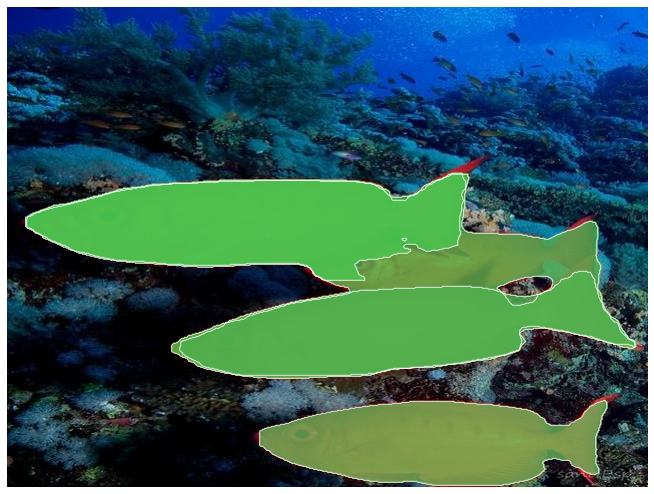

In [48]:
water_result = inference_detector(water_model, img)
show_result_pyplot(water_model, img, water_result, score_thr=score_thr)

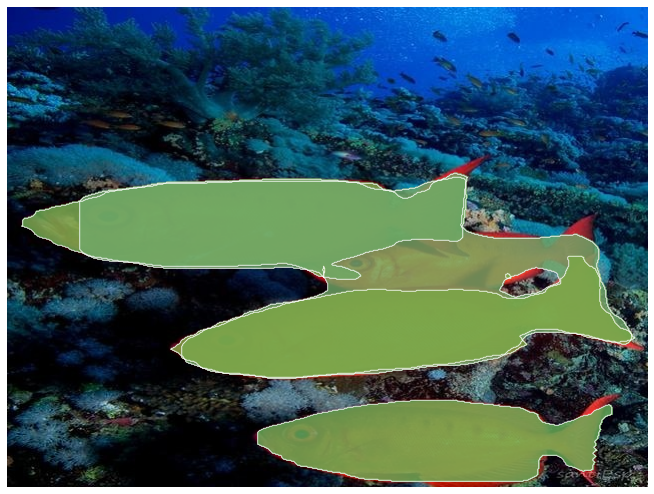

In [49]:
mask_result = inference_detector(mask_model, img)
show_result_pyplot(mask_model, img, mask_result, score_thr=score_thr)

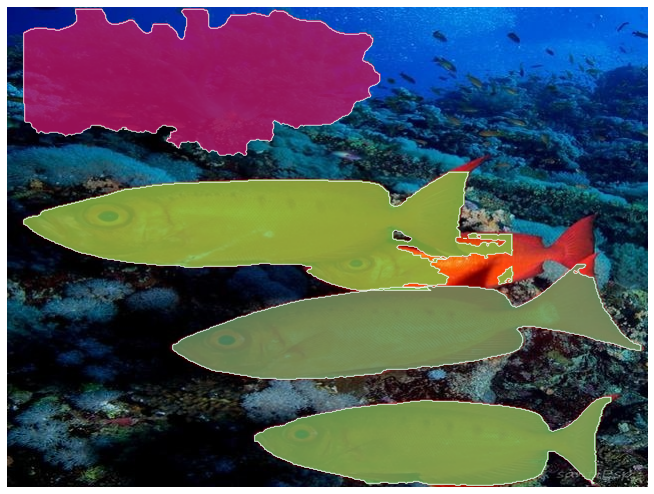

In [50]:
pointrend_result = inference_detector(pointrend_model, img)
show_result_pyplot(pointrend_model, img, pointrend_result, score_thr=score_thr)

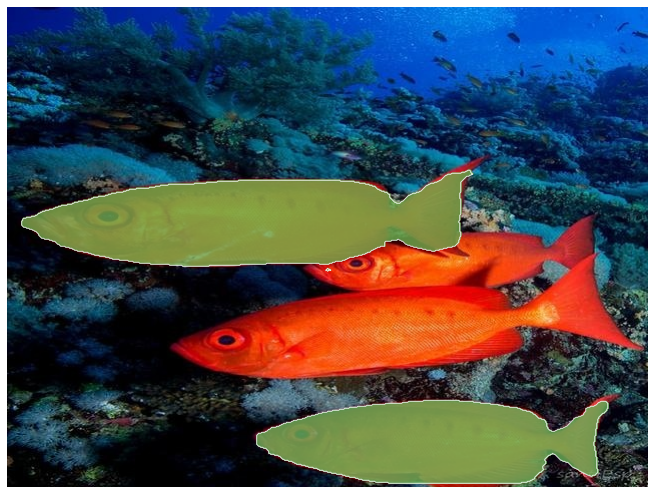

In [51]:
QueryInst_result = inference_detector(QueryInst_model, img)
show_result_pyplot(QueryInst_model, img, QueryInst_result, score_thr=score_thr)

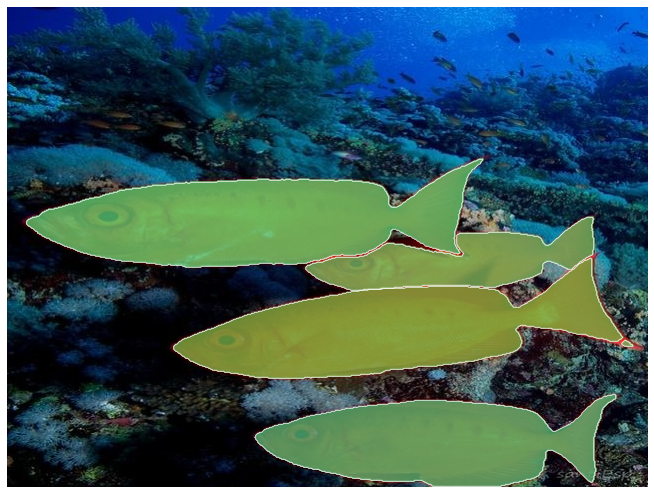

In [52]:
mask2former_result = inference_detector(mask2former_model, img)
show_result_pyplot(mask_model, img, mask2former_result, score_thr=score_thr)